# Lets get imported what we need to get rolling

In [1]:
from scipy.io import wavfile
from scipy.signal import hilbert
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

## How many bars?
nr_bars = 20
bar_width = 30/nr_bars*10
bar_factor=30/nr_bars*.8

## Read the audiofile - make sure the path is correct

In [2]:
# Load the audio file

path2snd = '../../wav/'
path2pic = '../../pics/'
#fname = 'wurstbrot'
fname = 'Railroad'
fend = '.wav'

f2read = path2snd + fname + fend

#sample_rate, data = wavfile.read('wav/Railroad.wav')
#sample_rate, data = sf.read('wav/wurstbrot.flac')

if (fend == '.flac'):
    data, samplerate = sf.read(f2read)
else:
    sample_rate, data = wavfile.read(f2read)



# If stereo, convert to mono
if len(data.shape) == 2:
    data = data.mean(axis=1)

print(f"Sample rate: {sample_rate} Hz")
print(f"Number of samples: {len(data)}")


Sample rate: 16000 Hz
Number of samples: 13466


In [3]:
# Compute the analytic signal
analytic_signal = hilbert(data)
amplitude_envelope = np.abs(analytic_signal)


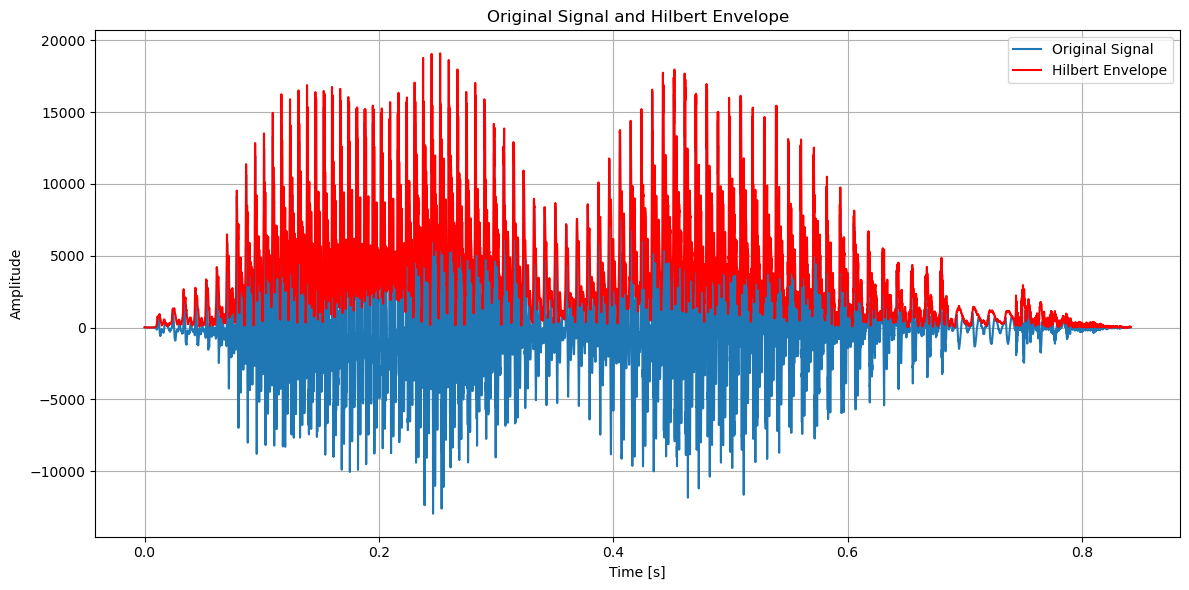

In [4]:
# Create time axis
time = np.arange(len(data)) / sample_rate

# Plot the waveform and envelope
plt.figure(figsize=(12, 6))
plt.plot(time, data, label='Original Signal')
plt.plot(time, amplitude_envelope, label='Hilbert Envelope', color='red')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Original Signal and Hilbert Envelope')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Let's have a look

You can see that the envelope is rather peaky - so we probably want to smoothen that a bit

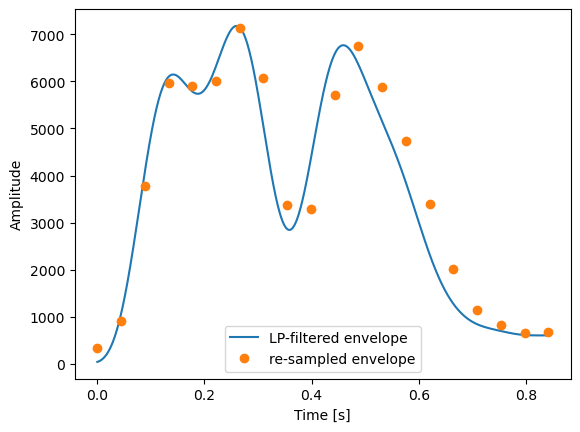

In [5]:
# Get total length of signal and distribute in pre-defined number of bins

## do we want to smoothen? Lets make a simple Butterworth LP filter and zero-phase filtering
B, A = signal.butter(5, .001, 'low')
envelope_lp = signal.filtfilt(B,A, amplitude_envelope)

# Timestamps of x1
t1 = np.linspace(0, time[-1]-time[0], nr_bars, endpoint=True)  

# Plot the LP-filtered envelope 
plt.plot(time, envelope_lp, label='LP-filtered envelope')

## Resample to extract the number of points we would like to have
envelope_re = signal.resample(envelope_lp, nr_bars)

# Plot again
plt.plot(t1, envelope_re, 'o', label='re-sampled envelope')

plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

# Cool - so let's do some artistic work

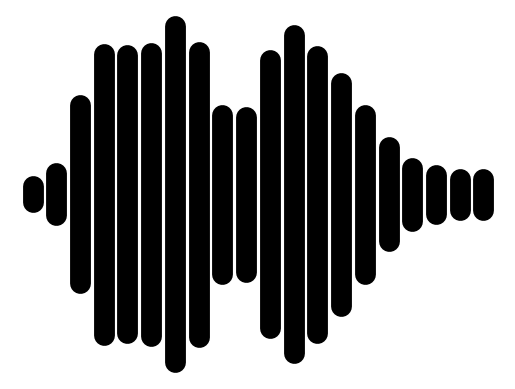

In [6]:
## Define function to plot bars
def symbar(x, y, nr_bars, bar_width):
    for idx in range(0,len(x)):
        #plt.bar(x[idx], y[idx], width=bar_factor*1/nr_bars, color='black', capstyle='round')
        #plt.bar(x[idx], -y[idx], width =bar_factor* 1/nr_bars, color='gray')
        #plt.arrow(x[idx], 0, 0, y[idx], lw = 10, capstyle='round', head_length=10)
        #plt.arrow(x[idx], 0, 0, -y[idx], lw = 10, capstyle='round')
        ln, = plt.plot((x[idx],x[idx]), (y[idx],-y[idx]), lw=bar_width,  color='black')
        ln.set_solid_capstyle('round')


symbar(t1, envelope_re, nr_bars, bar_width)

plt.axis('off')
plt.savefig(path2pic + 'CANIDOTHAT_envbar_' + fname + '.png', format='png', dpi=600, transparent=True)
plt.savefig(path2pic + 'CANIDOTHAT_envbar_' + fname + '.svg', format='svg', transparent=True)